# <center>Survey of employees exiting TAFE and DETE in Queensland   <center>

The aim of this analysis is look at 2 datasets provided by DETE and TAFE for:                         
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?                 

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?     

TAFE data is here:   https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey                 
DETE data is here:   https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey

## 1. Importing and first glace at the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.shape

(822, 56)

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
tafe_survey.shape

(702, 72)

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [10]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

## Summary
### DETE Survey
- This data contains 822 rows and 56 columns
- The columns with the most missing fields are:
Aboriginal                             806
Torres Strait                          819
South Sea                              815
Disability                             799
NESB                                   790

- Alot of fields are set to be strings but have numerical values within them and may need to be converted to floats and integers
- Some fields are entered as 'No Stated' and arent represented as NaNs (Dete survey)


### TAFE Survey
- This data contains 702 rows and 72 columns 
- There are very long names for the columns and this should be shortened
- Consideration is required for most of the fields are strings and may also need to be converted to int or floats

## 2. Changing fields to NaNs and removing columns

Removing 'Not Stated' answers so that they register as NaN                
Dropping some of the columns

In [11]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [12]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [13]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [14]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [15]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

These columns were removed from both of the surveys for they were not going to contribute to the information from the dataset

## 3. Changing column names and cleaning the columns

In [16]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [17]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace('_', ' ')

In [18]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease date', 'dete start date',
       'role start date', 'position', 'classification', 'region',
       'business unit', 'employment status', 'career move to public sector',
       'career move to private sector', 'interpersonal conflicts',
       'job dissatisfaction', 'dissatisfaction with the department',
       'physical work environment', 'lack of recognition',
       'lack of job security', 'work location', 'employment conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill health',
       'traumatic incident', 'work life balance', 'workload',
       'none of the above', 'gender', 'age', 'aboriginal', 'torres strait',
       'south sea', 'disability', 'nesb'],
      dtype='object')

In [19]:
dete_survey_updated.head()

,id,separationtype,cease date,dete start date,role start date,position,classification,region,business unit,employment status,...,work life balance,workload,none of the above,gender,age,aboriginal,torres strait,south sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Changing the TAFE survery columns to make them shorter and easier to read

In [20]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [21]:
tafe_survey_updated.rename(columns={'Record ID': 'id',
                                    'CESSATION YEAR': 'cease date',
                                    'Reason for ceasing employment': 'separationtype',
                                    'Gender. What is your Gender?': 'gender',
                                    'CurrentAge. Current Age': 'age',
                                    'Employment Type. Employment Type': 'employment_status',
                                    'Classification. Classification': 'position',
                                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute service',
                                    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role service'}, inplace=True)

In [22]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute service',
       'role service'],
      dtype='object')

In [23]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute service,role service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## 4. Searching and selecting for the term 'resignation'

Do short term or long term employees leave? How to answer this question

In [24]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [25]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [26]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()

In [27]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)].copy()

Here we wanted to obtain data that would assist us in obtaining the answer we wanted to find. 
So I selected answers that had the word resignation in them to see if they were short or long term workers.

## 5. Cleaning up the date field columns

Specifically cleaning the 'cease_date' and 'dete_start_date'.                     
Remove dates that are in the future                
Removing dates before 1940         
### dete_resignations first

In [28]:
dete_resignations.head()

,id,separationtype,cease date,dete start date,role start date,position,classification,region,business unit,employment status,...,work life balance,workload,none of the above,gender,age,aboriginal,torres strait,south sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [29]:
dete_resignations['cease date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
07/2006      1
09/2010      1
Name: cease date, dtype: int64

In [30]:
pattern = r"([2][0][0-9][0-9])"
dete_resignations['cease date'] = dete_resignations['cease date'].str.extract(pattern).astype('float')
dete_resignations['cease date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease date, dtype: int64

In [31]:
dete_resignations['cease date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease date, dtype: int64

In [32]:
dete_resignations['cease date'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease date, dtype: int64

In [33]:
dete_resignations['dete start date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete start date, dtype: int64

### tafe_resignations for their ceasession date only - Start date info not available

In [34]:
tafe_resignations['cease date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease date, dtype: int64

In [35]:
tafe_resignations['cease date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease date, dtype: int64

In [36]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

### Graphing to give an indication of cease date year


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

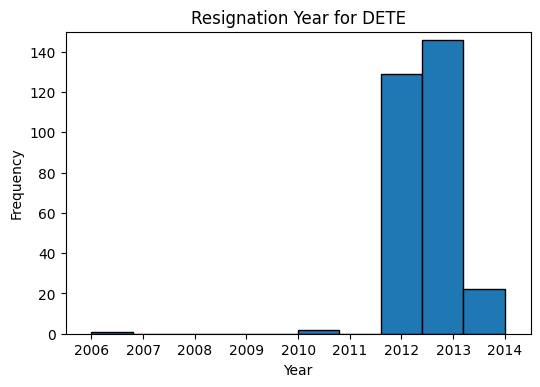

In [38]:
dete_resignations['cease date'].plot.hist(edgecolor='black')
plt.xlim(2005.5, 2014.5) 
plt.ylim(0, 150) 
plt.xlabel('Year')
plt.title('Resignation Year for DETE')
plt.show()

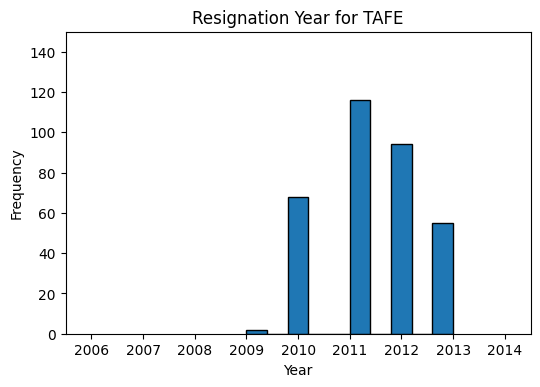

In [39]:
tafe_resignations['cease date'].plot.hist(edgecolor='black')
plt.xlim(2005.5, 2014.5) 
plt.ylim(0, 150) 
plt.xlabel('Year')
plt.title('Resignation Year for TAFE')
plt.show()

## 6. Making a 'institute service' column to answer survey question

Do short term or long term employees leave?

In [40]:
dete_resignations['institute service'] = dete_resignations['cease date'] - dete_resignations['dete start date']
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease date                           300 non-null    float64
 3   dete start date                      283 non-null    float64
 4   role start date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business unit                        32 non-null     object 
 9   employment status                    307 non-null    object 
 10  career move to public sector         311 non-null    bool   
 11  career move to private sector   

In [41]:
dete_resignations['institute service'].value_counts().head()

5.0    23
1.0    22
3.0    20
0.0    20
6.0    17
Name: institute service, dtype: int64

## 7. Who was dissatisfied?

In [42]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [43]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Making a function to define is the value is TRUE or FALSE or NaN (Missing value)

In [44]:
def update_vals (val):
    if val == '-':
        return False
    elif (pd.isnull(val)):
        return np.nan
    else:
        return True

In [45]:
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

In [46]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [47]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Making a new 'dissatisfied' column to collect the Trues

In [48]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis = 1, skipna = False)
tafe_resignations.head()

,id,Institute,WorkArea,cease date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute service,role service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [49]:
tafe_resignations['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

### Now to set the True, False or NaN values for the Dete survey

To check that the values are already booleans

In [50]:
dete_resignations['lack of recognition'].value_counts()

False    278
True      33
Name: lack of recognition, dtype: int64

In [51]:
job_dissatisfaction = ['job dissatisfaction',
'dissatisfaction with the department',
'physical work environment',
'lack of recognition',
'lack of job security',
'work location',
'employment conditions',
'work life balance',
'workload']

dete_resignations['dissatisfied'] = dete_resignations[job_dissatisfaction].any(axis = 1, skipna = False)
dete_resignations.head()

,id,separationtype,cease date,dete start date,role start date,position,classification,region,business unit,employment status,...,none of the above,gender,age,aboriginal,torres strait,south sea,disability,nesb,institute service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


In [52]:
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [53]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Here the data was already true or false so I just had to accumulate the values in a new column.

## 8. Aggreating the 2 datasets together

Adding a new column to each dataset so we can see which originated from which

In [54]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [55]:
dete_resignations_up['institute'].value_counts()

DETE    311
Name: institute, dtype: int64

In [56]:
tafe_resignations_up['institute'].value_counts()

TAFE    340
Name: institute, dtype: int64

In [57]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)

In [58]:
combined.shape

(651, 54)

In [59]:
combined.head()

,id,separationtype,cease date,dete start date,role start date,position,classification,region,business unit,employment status,...,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,employment_status,role service
3,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 54 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease date                                           635 non-null    float64
 3   dete start date                                      283 non-null    float64
 4   role start date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business unit                                        32 non-null     o

Removing the columns with too many null values

In [61]:
combined.isnull().sum()

id                                                       0
separationtype                                           0
cease date                                              16
dete start date                                        368
role start date                                        380
position                                                53
classification                                         490
region                                                 386
business unit                                          619
employment status                                      344
career move to public sector                           340
career move to private sector                          340
interpersonal conflicts                                340
job dissatisfaction                                    340
dissatisfaction with the department                    340
physical work environment                              340
lack of recognition                                    3

In [62]:
combined_updated = combined.dropna(axis=1, thresh= 500)
# combined_updated = combined.dropna(axis=0, thresh= 2)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease date         635 non-null    float64
 3   position           598 non-null    object 
 4   gender             592 non-null    object 
 5   age                596 non-null    object 
 6   institute service  563 non-null    object 
 7   dissatisfied       643 non-null    object 
 8   institute          651 non-null    object 
dtypes: float64(2), object(7)
memory usage: 50.9+ KB


In [63]:
combined_updated

,id,separationtype,cease date,position,gender,age,institute service,dissatisfied,institute
3,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Female,36-40,7,False,DETE
5,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Female,41-45,18,True,DETE
8,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Female,31-35,3,False,DETE
9,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Female,46-50,15,True,DETE
11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Male,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,Operational (OO),Male,21 25,5-6,False,TAFE
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Male,51-55,1-2,False,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Female,51-55,5-6,False,TAFE


Here we also kept columns that have more than 500 meaningful values

## 9. Categorising the 'institute service' column for results

In [64]:
combined_updated['institute service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [65]:
combined_updated['institute service'].astype('str')

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
696     5-6
697     1-2
698     nan
699     5-6
701     3-4
Name: institute service, Length: 651, dtype: object

Use vectorised string methods to extract the years               
Found here https://pandas.pydata.org/pandas-docs/stable/text.html#text-summary

In [66]:
combined_updated['institute service'] = combined_updated['institute service'].str.extract(r'(\d+)')

<ipython-input-66-a6cf50a73d55>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
combined_updated['institute service'].value_counts()

1     137
3      63
5      33
11     26
7      21
20     10
Name: institute service, dtype: int64

In [81]:
combined_updated['institute service'] = combined_updated['institute service'].astype(float)

<ipython-input-81-c7ed23dae96a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease date         635 non-null    float64
 3   position           598 non-null    object 
 4   gender             592 non-null    object 
 5   age                596 non-null    object 
 6   institute service  290 non-null    float64
 7   dissatisfied       643 non-null    object 
 8   institute          651 non-null    object 
dtypes: float64(3), object(6)
memory usage: 50.9+ KB


In [83]:
def categories (num):
    if (pd.isnull(num)):
        return np.nan
    elif num < 3:
        return 'New'
    elif num >= 3 and num <= 6:
        return 'Experienced'
    elif num >= 7 and num <= 10:
        return 'Established'
    else:
        return 'Veteran'

In [84]:
combined_updated['service cat'] = combined_updated['institute service'].apply(categories)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease date         635 non-null    float64
 3   position           598 non-null    object 
 4   gender             592 non-null    object 
 5   age                596 non-null    object 
 6   institute service  290 non-null    float64
 7   dissatisfied       643 non-null    object 
 8   institute          651 non-null    object 
 9   service cat        290 non-null    object 
dtypes: float64(3), object(7)
memory usage: 55.9+ KB


<ipython-input-84-6fb1852be69a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
combined_updated

,id,separationtype,cease date,position,gender,age,institute service,dissatisfied,institute,service cat
3,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Female,36-40,NaN,False,DETE,NaN
5,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Female,41-45,NaN,True,DETE,NaN
8,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Female,31-35,NaN,False,DETE,NaN
9,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Female,46-50,NaN,True,DETE,NaN
11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Male,31-35,NaN,False,DETE,NaN
...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,Operational (OO),Male,21 25,5.0,False,TAFE,Experienced
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Male,51-55,1.0,False,TAFE,New
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,False,TAFE,NaN
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Female,51-55,5.0,False,TAFE,Experienced


In [89]:
combined_updated['service cat'].value_counts()

New            137
Experienced     96
Veteran         36
Established     21
Name: service cat, dtype: int64

These are the categories I went with for classification:  
        **New:** Less than 3 years at a company             
        **Experienced:** 3-6 years at a company          
        **Established:** 7-10 years at a company            
        **Veteran:** 11 or more years at a company         


## 10. Examining the dissatisfied column

In [93]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [97]:
combined_updated['dissatisfied'].isnull().sum()

0

Exchanging the missing values with the most common answer which is False in this case

In [96]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

<ipython-input-96-0dc043a277ea>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [101]:
dissatisfied_table = combined_updated.pivot_table(values='dissatisfied', index = 'service cat')
dissatisfied_table

,dissatisfied
service cat,
Established,0.333333
Experienced,0.250000
New,0.262774
Veteran,0.277778


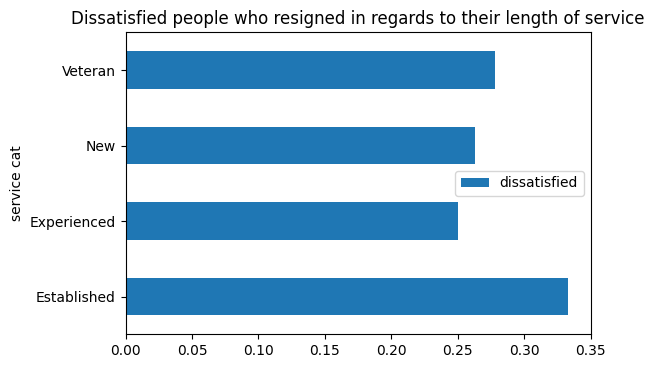

In [113]:
dissatisfied_table.plot(kind='barh', title='Dissatisfied people who resigned in regards to their length of service')
plt.show()

These are the categories I went with for classification:  
        **New:** Less than 3 years at a company             
        **Experienced:** 3-6 years at a company          
        **Established:** 7-10 years at a company            
        **Veteran:** 11 or more years at a company  

## Summary

From this study I could find that there were a relatively similar distribution of dissatisfied people who left their jobs based on their length of service. The smallest proportions were the Experienced people with 3-6 years with the institute whom make up 25% of resignations. The largest proportion lays with the Established group with more than 10 years experience with the institue making 33% of resignations. Altogether this outlines That an even amount of people leave the institute regardless of age but since the majority leave after over 10 years, perhaps the institute does a good job of looking after their employees.

Thanks again for reading!
Have a great week!!

With best regards,
Bill